In [1]:
import sys
  
# adding Folder_2 to the system path
sys.path.insert(0, 'C:/Users/taiz_/OneDrive/Documents/Documentos/CURSOS_Dev/Tera/Projeto/projeto_acao')

from price_economics_technical_analysis_class import Price_Historical_Data_technical_analysis

In [2]:
from datetime import date
import numpy as np
import pandas as pd 

from matplotlib import pyplot as plt


import plotly.express as px

In [3]:
#!pip install git+https://github.com/quantopian/pyfolio
#!pip install PyPortfolioOpt

In [4]:
import pyfolio as pf


C:\Users\taiz_\anaconda3\envs\ds\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [5]:
from pypfopt import risk_models
from pypfopt.efficient_frontier import EfficientFrontier

from pypfopt import expected_returns

In [6]:
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [7]:
price_data =Price_Historical_Data_technical_analysis()

In [8]:
Price_Historical_Data_technical_analysis().cotacao_conjunto_acao_somente_adj_close.__doc__


"\n        Coleta somente ['Adj Close'] de multiplas ações api yfinance\n        lista: []\n        stock format: 'ABEV3.SA' para as ações brasileiras\n        start, end format: '2000-01-01'\n        interval: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo   default:'1d'\n        Returns: dataFrame\n        index.name = 'data'\n        "

In [9]:
stocks= { 
    'stock':['B3SA3', 'CSNA3', 'MGLU3', 'VALE3', 'ITUB4'],
    'quantity': [9600, 4300, 5000, 1600, 2000],
}

In [10]:
stocks_SA = [s+'.SA' for s in stocks['stock']]
stocks_SA

['B3SA3.SA', 'CSNA3.SA', 'MGLU3.SA', 'VALE3.SA', 'ITUB4.SA']

In [11]:
data = price_data.cotacao_conjunto_acao_somente_adj_close(['B3SA3.SA', 'CSNA3.SA', 'MGLU3.SA', 'VALE3.SA', 'ITUB4.SA'], start=date(2021,1,1), end= date(2023,1,24) )

[*********************100%***********************]  5 of 5 completed


In [12]:
data.head()

,B3SA3.SA,CSNA3.SA,ITUB4.SA,MGLU3.SA,VALE3.SA
data,,,,,
2021-01-04,18.484875,27.975859,28.645199,25.181740,70.937416
2021-01-05,18.521254,28.483473,28.459793,24.742058,72.131859
2021-01-06,18.218122,29.686995,29.294115,23.442999,74.497490
2021-01-07,18.727381,31.545504,30.434368,23.143217,79.360558
2021-01-08,19.003229,31.733812,30.425089,23.822723,79.112366


In [13]:
actual_value = round(data.loc[data.index == data.index[-1]] * stocks['quantity'], 2).reset_index(drop= True).T

percent = []
[percent.append(actual_value[0][i]/actual_value.sum().values[0] ) for i in range(len(actual_value))] 

actual_value['weight'] = percent

In [14]:
actual_value.rename(columns={0: 'valor'})

,valor,weight
B3SA3.SA,121440.00,0.233454
CSNA3.SA,77185.00,0.148379
ITUB4.SA,126500.00,0.243181
MGLU3.SA,6464.00,0.012426
VALE3.SA,188600.01,0.362561


In [15]:
data[-1:]

,B3SA3.SA,CSNA3.SA,ITUB4.SA,MGLU3.SA,VALE3.SA
data,,,,,
2023-01-23,12.65,17.950001,25.299999,4.04,94.300003


In [16]:
data[0:1]

,B3SA3.SA,CSNA3.SA,ITUB4.SA,MGLU3.SA,VALE3.SA
data,,,,,
2021-01-04,18.484875,27.975859,28.645199,25.18174,70.937416


**Annualizing portfolio returns**

In [17]:
# Calculate total rate of return from portfolio 
total_return = (data[-1:]- data[0:1].values ) / data[0:1].values
total_return

,B3SA3.SA,CSNA3.SA,ITUB4.SA,MGLU3.SA,VALE3.SA
data,,,,,
2023-01-23,-0.315657,-0.358375,-0.11678,-0.839566,0.329341


In [18]:
(data[-1:]- data[0:1].values ) / data[0:1].values

,B3SA3.SA,CSNA3.SA,ITUB4.SA,MGLU3.SA,VALE3.SA
data,,,,,
2023-01-23,-0.315657,-0.358375,-0.11678,-0.839566,0.329341


In [19]:
months = abs(diff_month(data.index[0], data.index[-1]))

In [20]:
# Annualize return
annualized_return = ((1 + total_return)**(12/months))-1
annualized_return


,B3SA3.SA,CSNA3.SA,ITUB4.SA,MGLU3.SA,VALE3.SA
data,,,,,
2023-01-23,-0.17275,-0.198985,-0.060202,-0.599458,0.15297


In [65]:
# Create the returns data 
returns_portfolio = data.pct_change()
returns_portfolio

,B3SA3.SA,CSNA3.SA,ITUB4.SA,MGLU3.SA,VALE3.SA
data,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.001968,0.018145,-0.006472,-0.017460,0.016838
2021-01-06,-0.016367,0.042253,0.029316,-0.052504,0.032796
2021-01-07,0.027953,0.062603,0.038924,-0.012788,0.065278
2021-01-08,0.014730,0.005969,-0.000305,0.029361,-0.003127
...,...,...,...,...,...
2023-01-17,0.004633,0.010235,0.020727,-0.015584,-0.001301
2023-01-18,0.005380,0.031585,0.018008,-0.060686,0.013134
2023-01-19,-0.008410,0.005777,0.000000,0.070225,0.004285


In [66]:

# Calcula o retorno do portfolio com peso
returns_portfolio = returns_portfolio.assign(portfolio = returns_portfolio.dot(actual_value['weight']))
returns_portfolio

,B3SA3.SA,CSNA3.SA,ITUB4.SA,MGLU3.SA,VALE3.SA,portfolio
data,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.001968,0.018145,-0.006472,-0.017460,0.016838,0.007466
2021-01-06,-0.016367,0.042253,0.029316,-0.052504,0.032796,0.020816
2021-01-07,0.027953,0.062603,0.038924,-0.012788,0.065278,0.048789
2021-01-08,0.014730,0.005969,-0.000305,0.029361,-0.003127,0.003481
...,...,...,...,...,...,...
2023-01-17,0.004633,0.010235,0.020727,-0.015584,-0.001301,0.006975
2023-01-18,0.005380,0.031585,0.018008,-0.060686,0.013134,0.014329
2023-01-19,-0.008410,0.005777,0.000000,0.070225,0.004285,0.001320


In [67]:
# Calculate annualized volatility from the standard deviation
vol_portfolio = returns_portfolio.std() * np.sqrt(250)
vol_portfolio

B3SA3.SA     0.407028
CSNA3.SA     0.521549
ITUB4.SA     0.309692
MGLU3.SA     0.713029
VALE3.SA     0.364131
portfolio    0.273340
dtype: float64

In [145]:
#RISCO 
# Calculate the Sharpe ratio 
#The Sharpe ratio compares the return of an investment with its risk. It's a mathematical expression of the insight that excess returns over a period of time may signify more volatility and risk, rather than investing skill
rfr = 0.12
sharpe_ratio = ((annualized_return - rfr) / vol_portfolio)
sharpe_ratio

B3SA3.SA    -0.712463
CSNA3.SA    -0.605622
ITUB4.SA    -0.578568
MGLU3.SA    -0.999927
VALE3.SA     0.082648
portfolio   -0.474979
dtype: float64

In [69]:
downside_returns = returns_portfolio[returns_portfolio < - 0.01]

# Calculate expected return and std dev of downside
expected_return = returns_portfolio.mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
sortino_ratio = (expected_return - rfr)/down_stdev

# Print the results
print("Expected return  : ", expected_return*100)
print()
print("Downside risk   : ", down_stdev*100)
print()
print("Sortino ratio : ", sortino_ratio)

Expected return  :  B3SA3.SA    -0.040924
CSNA3.SA    -0.032637
ITUB4.SA    -0.004693
MGLU3.SA    -0.255391
VALE3.SA     0.081935
portfolio    0.010995
dtype: float64

Downside risk   :  B3SA3.SA     1.568108
CSNA3.SA     1.757756
ITUB4.SA     1.660371
MGLU3.SA     2.666547
VALE3.SA     1.195888
portfolio    0.937711
dtype: float64

Sortino ratio :  B3SA3.SA     -7.678634
CSNA3.SA     -6.845455
ITUB4.SA     -7.230127
MGLU3.SA     -4.595978
VALE3.SA     -9.965870
portfolio   -12.785401
dtype: float64


In [70]:
# Calculate the max value 
roll_max = data.rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = data/roll_max - 1

In [71]:
daily_draw_down

,B3SA3.SA,CSNA3.SA,ITUB4.SA,MGLU3.SA,VALE3.SA
data,,,,,
2021-01-04,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-05,0.000000,0.000000,-0.006472,-0.017460,0.000000
2021-01-06,-0.016367,0.000000,0.000000,-0.069048,0.000000
2021-01-07,0.000000,0.000000,0.000000,-0.080952,0.000000
2021-01-08,0.000000,0.000000,-0.000305,-0.053968,-0.003127
...,...,...,...,...,...
2023-01-17,-0.173788,-0.326945,-0.141373,-0.484354,-0.038991
2023-01-18,-0.169342,-0.305686,-0.125911,-0.515646,-0.026370
2023-01-19,-0.176328,-0.301675,-0.125911,-0.481633,-0.022197


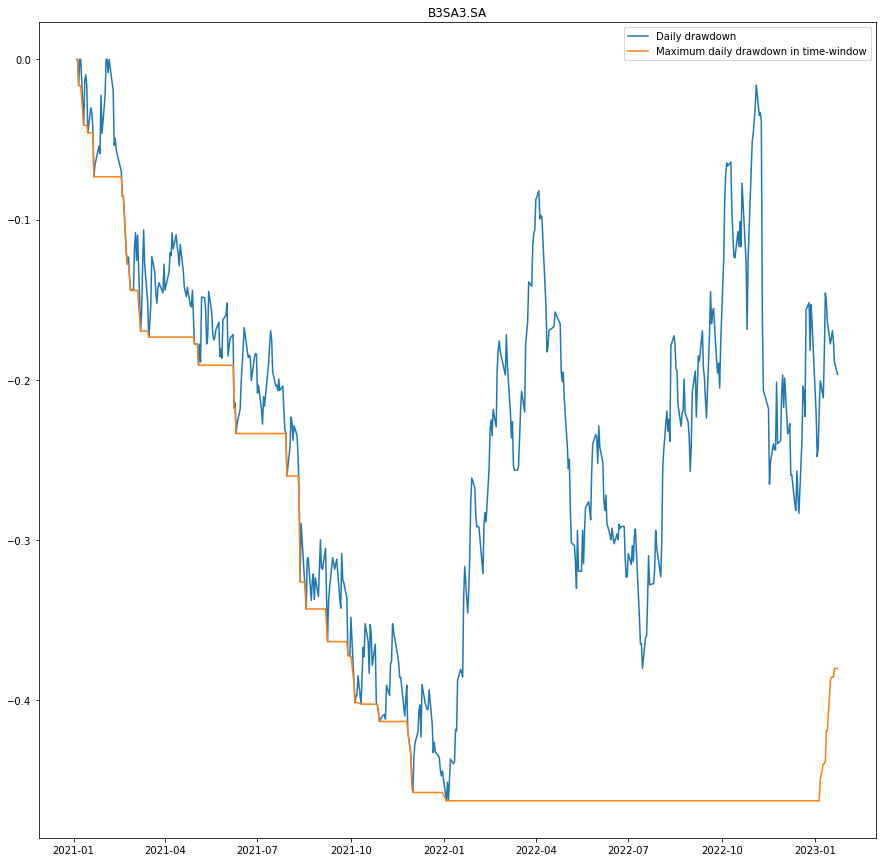

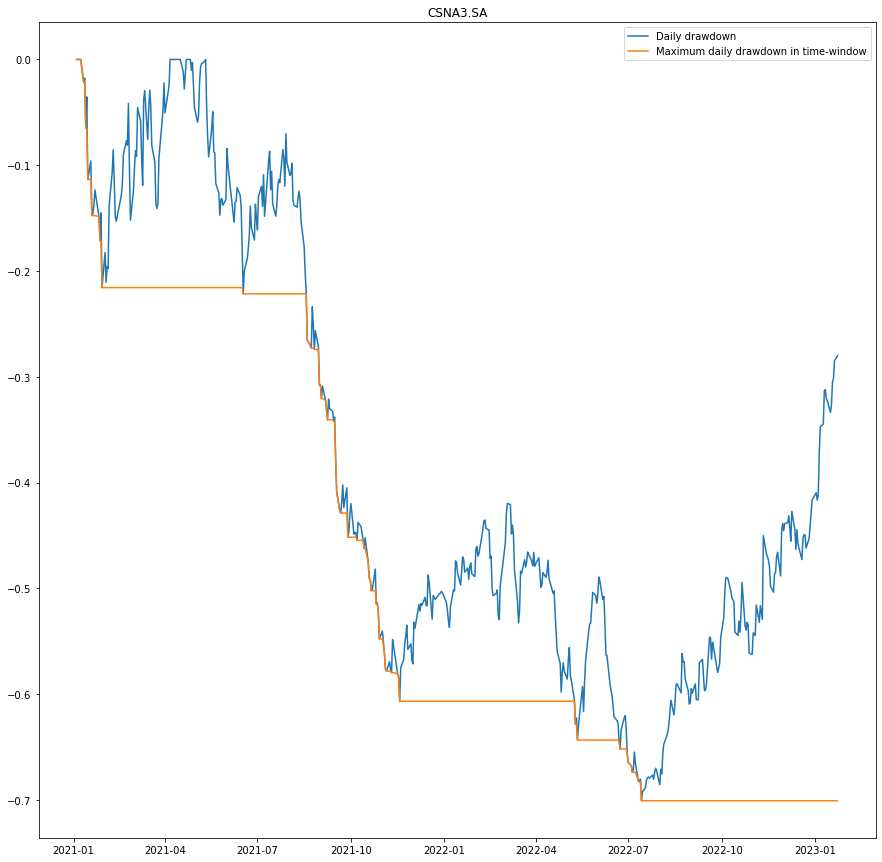

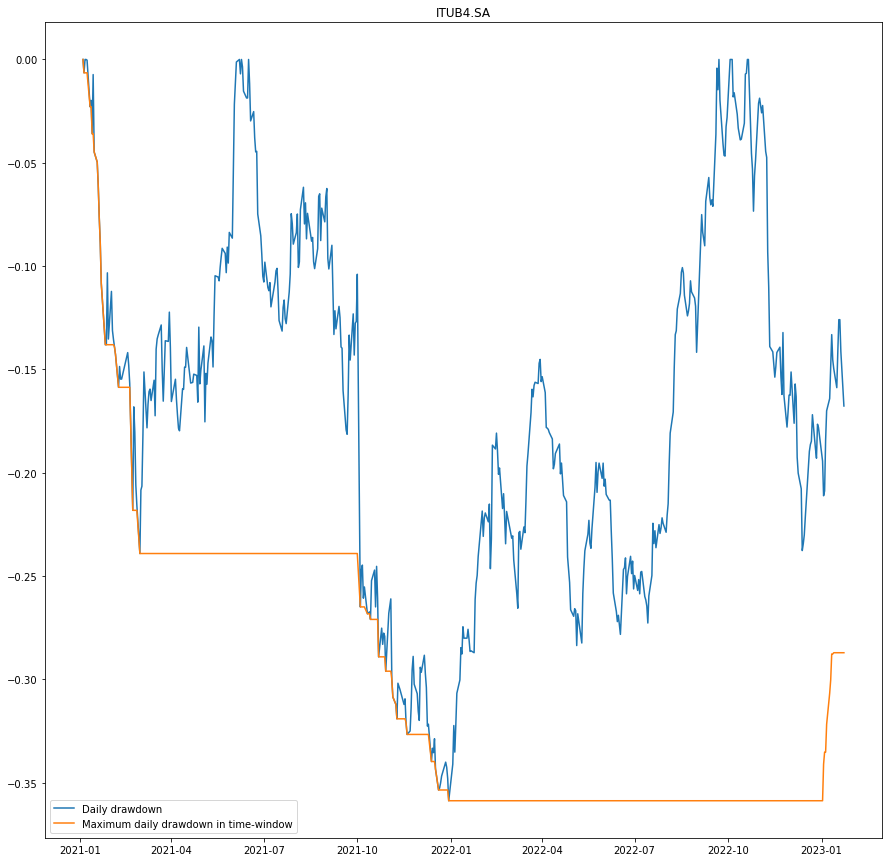

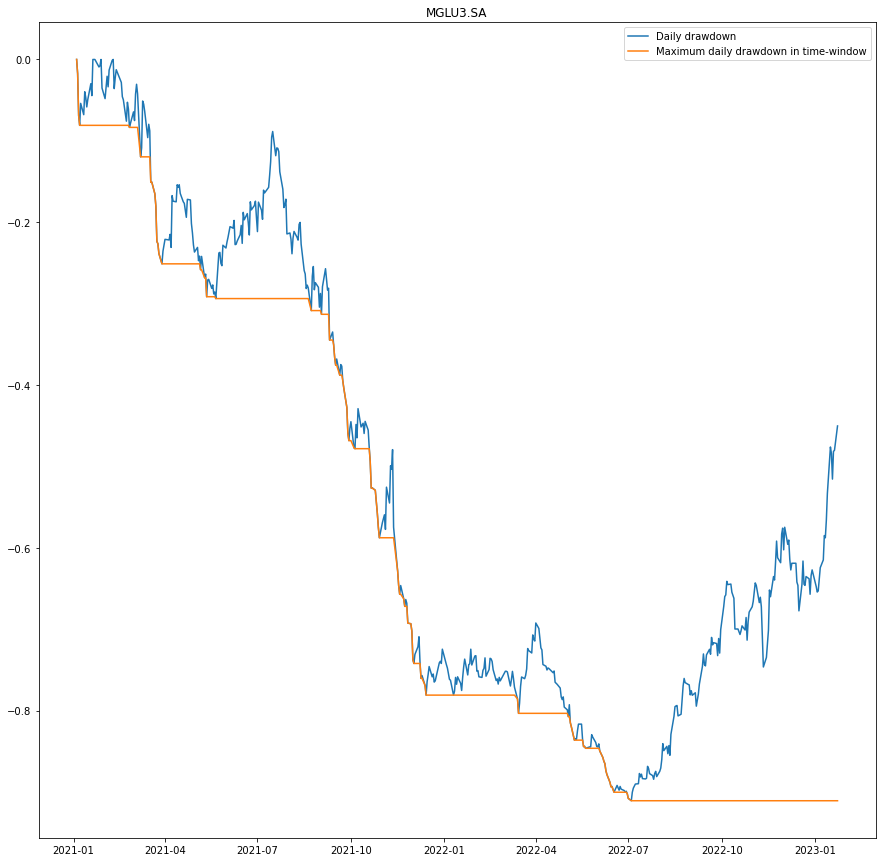

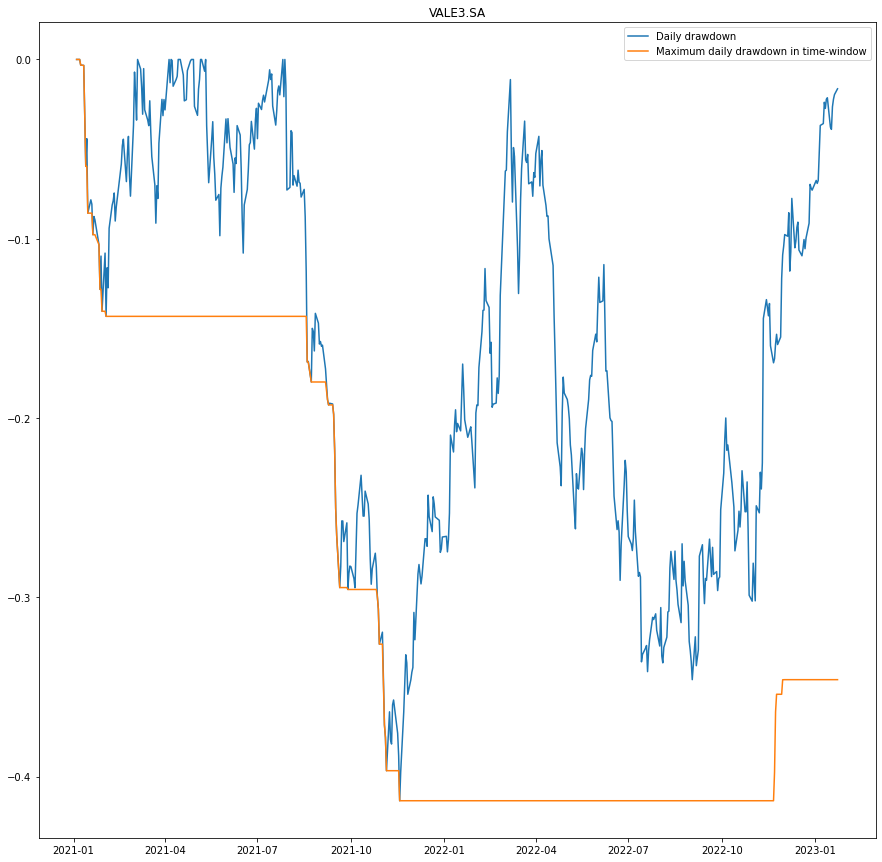

In [29]:
# Calculate the minimum (negative) daily draw-down
for colum in data.columns:
    max_daily_draw_down= daily_draw_down[colum].rolling(center=False,min_periods=1,window=252).min()

    # Plot the results
    plt.figure(figsize=(15,15))
    plt.plot(daily_draw_down[colum].index, daily_draw_down[colum], label='Daily drawdown')
    plt.plot(daily_draw_down[colum].index , max_daily_draw_down, label='Maximum daily drawdown in time-window')
    plt.legend()
    plt.title(colum)
    plt.show()

In [72]:
total_return_pf = (actual_value['weight']*returns_portfolio.mean()).sum()
total_return_pf

0.00010994915502349735

In [34]:
# Calcula o retorno acumulado diário
acum_index = (1+returns_portfolio).cumprod()

# Retira a data do index e transforma em coluna (para plotar)
acum = acum_index.reset_index(level = 0)

# Escolhe o tamanho do gráfico
plt.figure(figsize = (15, 10))

# Constrói o gráfico
fig = px.line(acum, x = 'data', y = stocks_SA + ['portfolio'])
fig.show()

<Figure size 1080x720 with 0 Axes>

In [74]:
# Calcula o retorno anualizado

N = len(acum_index)
annualized_return = acum_index.iloc[-1,] ** (252 / N) - 1

annualized_return

B3SA3.SA    -0.169993
CSNA3.SA    -0.195861
ITUB4.SA    -0.059178
MGLU3.SA    -0.592977
VALE3.SA     0.150095
portfolio   -0.009831
Name: 2023-01-23 00:00:00, dtype: float64

In [47]:
actual_value['weight']
#https://analisemacro.com.br/mercado-financeiro/construindo-uma-carteira-de-acoes-portfolio-em-python/

B3SA3.SA    0.233454
CSNA3.SA    0.148379
ITUB4.SA    0.243181
MGLU3.SA    0.012426
VALE3.SA    0.362561
Name: weight, dtype: float64

In [56]:
ibovespa = {
    'stock': ['RRRP3', 'ALSO3', 'ALPA4', 'ABEV3', 'ARZZ3', 'ASAI3', 'AZUL4', 'B3SA3', 'BPAN4', 'BBSE3', 'BBDC3', 'BBDC4', 
              'BRAP4', 'BBAS3', 'BRKM5', 'BRFS3', 'BPAC11', 'CRFB3', 'CCRO3', 'CMIG4'],
    'quantity': [196144.421,
330109.863,
202765.994,
4386652.506,
60758.326,
935793.199,
327646.296,
901731.302,
341549.703,
671682.536,
1508883.586,
5156077.326,
251016648,
1420731.069,
265212.486,
1076512.610,
1225470.424,
528743.156,
998462.635,
1442098.974 ]
}


In [57]:
total_ibov = (np.array(ibovespa['quantity']).sum())
total_ibov



272993674.412

In [58]:
ibovespa['weight']= (np.array(ibovespa['quantity'])/total_ibov )
ibovespa

{'stock': ['RRRP3',
  'ALSO3',
  'ALPA4',
  'ABEV3',
  'ARZZ3',
  'ASAI3',
  'AZUL4',
  'B3SA3',
  'BPAN4',
  'BBSE3',
  'BBDC3',
  'BBDC4',
  'BRAP4',
  'BBAS3',
  'BRKM5',
  'BRFS3',
  'BPAC11',
  'CRFB3',
  'CCRO3',
  'CMIG4'],
 'quantity': [196144.421,
  330109.863,
  202765.994,
  4386652.506,
  60758.326,
  935793.199,
  327646.296,
  901731.302,
  341549.703,
  671682.536,
  1508883.586,
  5156077.326,
  251016648,
  1420731.069,
  265212.486,
  1076512.61,
  1225470.424,
  528743.156,
  998462.635,
  1442098.974],
 'weight': array([7.18494381e-04, 1.20922166e-03, 7.42749789e-04, 1.60686965e-02,
        2.22563128e-04, 3.42789334e-03, 1.20019739e-03, 3.30312160e-03,
        1.25112680e-03, 2.46043260e-03, 5.52717417e-03, 1.88871678e-02,
        9.19496206e-01, 5.20426370e-03, 9.71496818e-04, 3.94336100e-03,
        4.48900667e-03, 1.93683299e-03, 3.65745704e-03, 5.28253622e-03])}

In [59]:
ibovespa_SA = [s+'.SA' for s in ibovespa['stock']]
ibovespa_SA

['RRRP3.SA',
 'ALSO3.SA',
 'ALPA4.SA',
 'ABEV3.SA',
 'ARZZ3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BPAN4.SA',
 'BBSE3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BRAP4.SA',
 'BBAS3.SA',
 'BRKM5.SA',
 'BRFS3.SA',
 'BPAC11.SA',
 'CRFB3.SA',
 'CCRO3.SA',
 'CMIG4.SA']

In [153]:
ibov_data = price_data.cotacao_conjunto_acao_somente_adj_close(ibovespa_SA, start=date(2021,1,1), end= date(2023,1,24) )

[*********************100%***********************]  20 of 20 completed


In [154]:
ibov_data.head(2)

,ABEV3.SA,ALPA4.SA,ALSO3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BPAN4.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,CCRO3.SA,CMIG4.SA,CRFB3.SA,RRRP3.SA
data,,,,,,,,,,,,,,,,,,,,
2021-01-04,14.085717,41.191307,27.418396,65.592361,NaN,37.730000,18.484873,32.590824,17.390413,19.593056,26.200596,22.075563,8.426155,38.762783,21.480000,19.049643,12.725806,7.485999,17.734768,36.41
2021-01-05,14.385996,41.211086,27.408667,64.589180,NaN,38.200001,18.521252,32.252686,17.307270,19.473600,25.710283,21.909546,8.390146,39.520554,21.309999,19.057802,12.514828,7.485999,17.614382,37.59


In [157]:
mean_return_bench = ibov_data.pct_change().mean()



In [158]:
total_return_ibov = (ibovespa['weight']* mean_return_bench).sum()
total_return_ibov

-0.00012051028672087446

In [159]:
# Calculate and print the active return
active_return = total_return_pf - total_return_ibov
print ("%.4f%%" % active_return)

0.0002%


## Performance tear sheet

In [62]:
returns_portfolio.index=pd.to_datetime(returns_portfolio.index)

returns = pd.Series(returns_portfolio['VALE3.SA'])
returns

data
2021-01-04         NaN
2021-01-05    0.016838
2021-01-06    0.032796
2021-01-07    0.065278
2021-01-08   -0.003127
                ...   
2023-01-17   -0.001301
2023-01-18    0.013134
2023-01-19    0.004285
2023-01-20    0.002667
2023-01-23    0.003298
Name: VALE3.SA, Length: 513, dtype: float64

C:\Users\taiz_\anaconda3\envs\ds\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Start date,2021-01-04
End date,2023-01-23
Total months,24
,Backtest
Annual return,15.009%
Cumulative returns,32.934%
Annual volatility,36.558%
Sharpe ratio,0.56
Calmar ratio,0.36
Stability,0.03
Max drawdown,-41.343%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,41.34,2021-07-28,2021-11-18,NaT,NaN
1,14.33,2021-01-07,2021-02-02,2021-03-05,42
2,10.80,2021-05-11,2021-06-17,2021-07-26,55
3,9.13,2021-03-05,2021-03-23,2021-04-05,22
4,3.12,2021-04-29,2021-05-03,2021-05-06,6


C:\Users\taiz_\anaconda3\envs\ds\lib\site-packages\pyfolio\plotting.py:805: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\taiz_\anaconda3\envs\ds\lib\site-packages\pyfolio\plotting.py:805: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\taiz_\anaconda3\envs\ds\lib\site-packages\pyfolio\plotting.py:805: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



NameError: name 'display_tear_sheet' is not defined

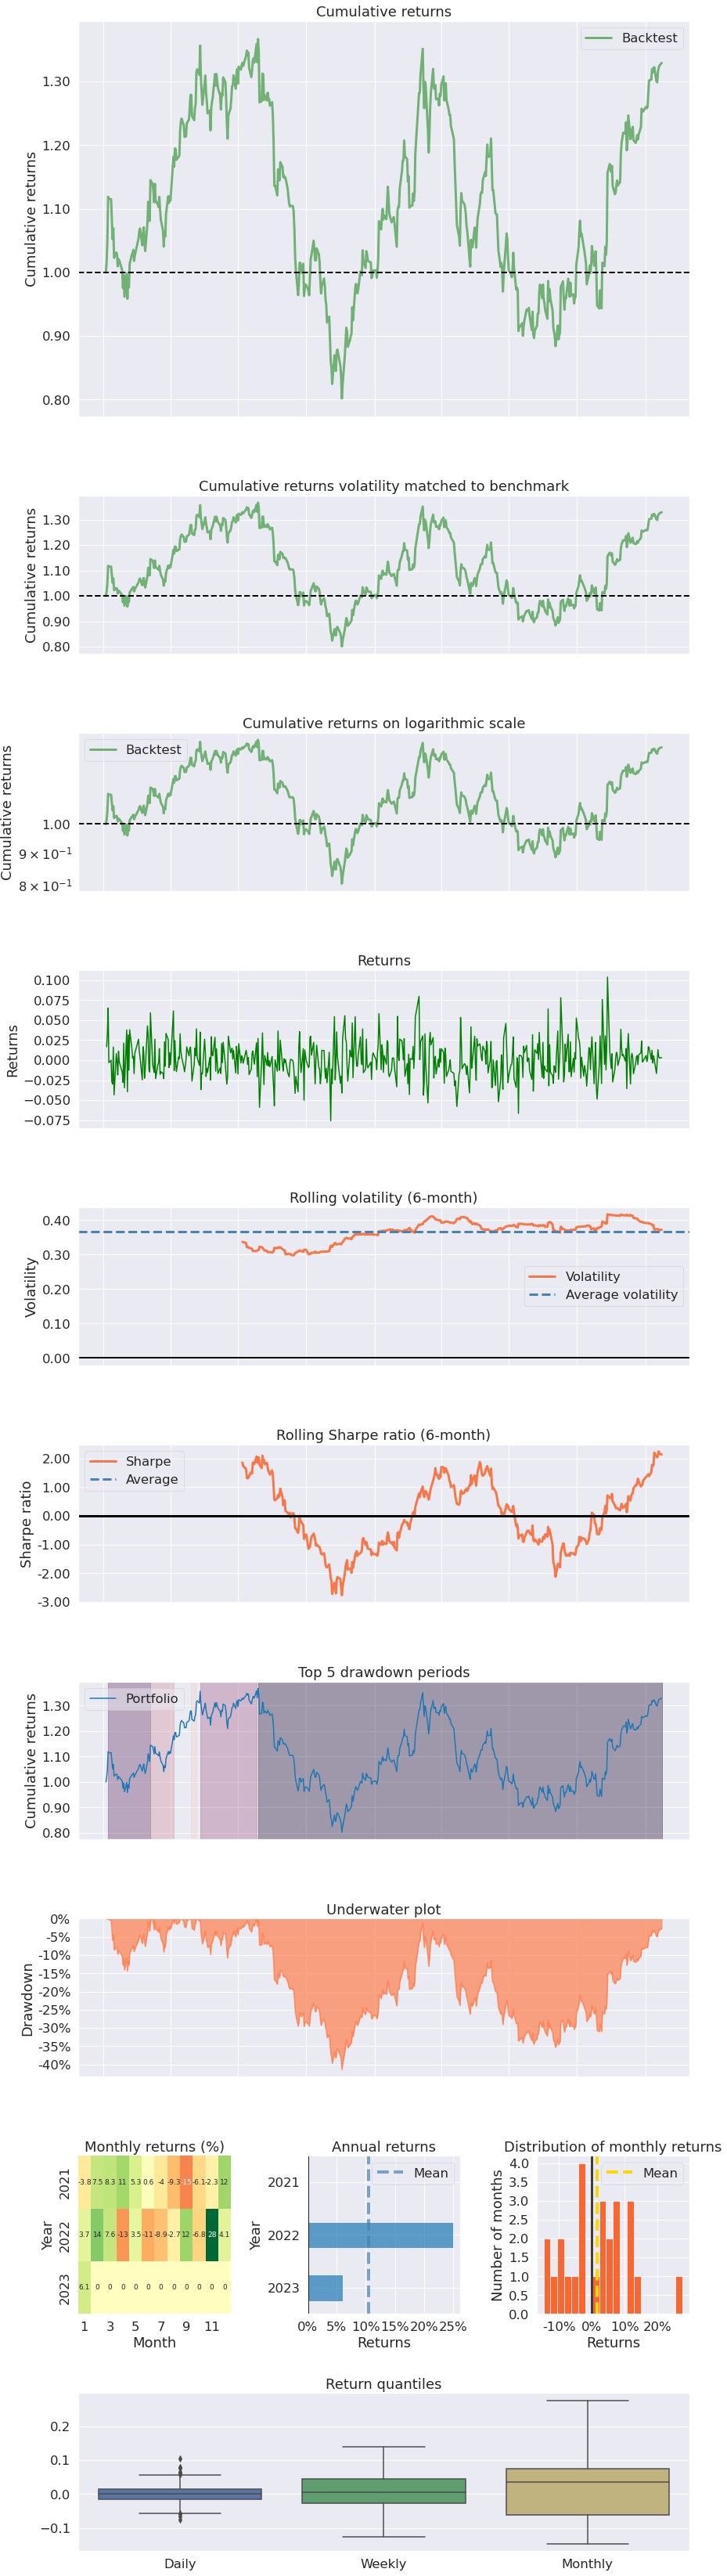

In [63]:
# Create the returns tear sheet
fig = pf.create_returns_tear_sheet(returns, return_fig=True)

# Display a zoomed in version of the tear sheet
display_tear_sheet()

## pypfopt

In [152]:
# Define exponentially weightedSigma and mu using stock_prices
Sigma = risk_models.exp_cov(data, span=30, frequency=252)
mu = expected_returns.ema_historical_return(data, frequency=30, span=100)

# Calculate the efficient frontier
ef = EfficientFrontier(mu, Sigma)

# Calculate weights for the maximum sharpe ratio optimization
raw_weights_maxsharpe = ef.max_sharpe()

# Show portfolio performance 
ef.portfolio_performance(verbose=True, risk_free_rate=0.12)

Expected annual return: 11.6%
Annual volatility: 21.7%
Sharpe Ratio: 0.44


C:\Users\taiz_\anaconda3\envs\ds\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:444: UserWarning:

The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.



(0.11594302524524652, 0.2166633390730564, 0.4428207635667224)

## Using downside risk in the optimization

PyPortfolioOpt allows you to use semicovariance in the optimization, this is a measure for
downside risk:

In [81]:
Sigma_semi = risk_models.semicovariance(data,benchmark=0.13, frequency=252)
print(Sigma_semi)


          B3SA3.SA  CSNA3.SA  ITUB4.SA  MGLU3.SA  VALE3.SA
B3SA3.SA  4.452327  4.336581  4.330370  4.491426  4.258843
CSNA3.SA  4.336581  4.553152  4.324721  4.440668  4.381755
ITUB4.SA  4.330370  4.324721  4.358363  4.397460  4.258579
MGLU3.SA  4.491426  4.440668  4.397460  4.938087  4.336422
VALE3.SA  4.258843  4.381755  4.258579  4.336422  4.338677


### Choosing from diferents targets

**target risk**

In [99]:
# Select an optimal return for a target risk
ef2 = EfficientFrontier(mu, Sigma)
ef2.efficient_risk(2)


OrderedDict([('B3SA3.SA', 1.253028e-10),
             ('CSNA3.SA', 0.9999999960729657),
             ('ITUB4.SA', 1.0871e-10),
             ('MGLU3.SA', 3.2626903e-09),
             ('VALE3.SA', 4.303883e-10)])

In [146]:
cleaned_weights_maxsharpe_EW = ef2.clean_weights()
ef2.portfolio_performance(verbose=True, risk_free_rate=0.12)

Expected annual return: 17.5%
Annual volatility: 42.4%
Sharpe Ratio: 0.13


(0.1751696300933053, 0.4238934721062196, 0.13014975158541922)

**target risk with DOWNSIDE**

In [129]:
# Select an optimal return for a target risk with DOWNSIDE
ef2_downside = EfficientFrontier(mu, Sigma_semi)
ef2_downside.efficient_risk(2.7)

OrderedDict([('B3SA3.SA', 1.103054e-10),
             ('CSNA3.SA', 0.9999999962228132),
             ('ITUB4.SA', 9.90812e-11),
             ('MGLU3.SA', 3.2159091e-09),
             ('VALE3.SA', 3.519765e-10)])

In [147]:
ef2_downside.clean_weights()
ef2_downside.portfolio_performance(verbose=True,risk_free_rate=0.12 ) 


Expected annual return: 17.5%
Annual volatility: 213.4%
Sharpe Ratio: 0.03


(0.17516963010435355, 2.1338115020580775, 0.0258549689375758)

**minimal Risk for a target return**

In [114]:
# Select a minimal risk for a target return
ef3 = EfficientFrontier(mu, Sigma)

ef3.efficient_return(0.17)

OrderedDict([('B3SA3.SA', 0.0),
             ('CSNA3.SA', 0.8392954900075363),
             ('ITUB4.SA', 0.0),
             ('MGLU3.SA', 0.12783977516942),
             ('VALE3.SA', 0.0328647348230437)])

In [148]:
ef3.clean_weights()
ef3.portfolio_performance(verbose=True, risk_free_rate=0.12)

Expected annual return: 17.0%
Annual volatility: 38.6%
Sharpe Ratio: 0.13


(0.17, 0.38615318002271104, 0.1294822950753878)

**minimal Risk for a target return with DOWNSIDE**

In [141]:
# Select a minimal risk for a target return
ef3_downside = EfficientFrontier(mu, Sigma_semi)

ef3_downside.efficient_return(0.17)

OrderedDict([('B3SA3.SA', 0.0),
             ('CSNA3.SA', 0.8539353218453957),
             ('ITUB4.SA', 0.0),
             ('MGLU3.SA', 0.1075573690597134),
             ('VALE3.SA', 0.0385073090948909)])

In [149]:
ef3_downside.clean_weights()
ef3_downside.portfolio_performance(verbose=True, risk_free_rate=0.12)

Expected annual return: 17.0%
Annual volatility: 212.7%
Sharpe Ratio: 0.02


(0.17, 2.126865480587443, 0.023508774041595685)

**minimal volatility**

In [118]:
# Select a minimal volatility
ef4 = EfficientFrontier(mu, Sigma)

ef4.min_volatility()

OrderedDict([('B3SA3.SA', 0.0),
             ('CSNA3.SA', 0.0),
             ('ITUB4.SA', 0.290925132740565),
             ('MGLU3.SA', 0.0476240372248273),
             ('VALE3.SA', 0.6614508300346077)])

In [150]:
ef4.clean_weights()
ef4.portfolio_performance(verbose=True, risk_free_rate=0.12)

Expected annual return: 7.2%
Annual volatility: 16.9%
Sharpe Ratio: -0.28


(0.07210487055579455, 0.16882593281687588, -0.2836953342716424)

**minimal volatility DOWNSIDE**

In [143]:
# Select a minimal volatility
ef4_dowside = EfficientFrontier(mu, Sigma_semi)

ef4_dowside.min_volatility()

OrderedDict([('B3SA3.SA', 0.0846581248864374),
             ('CSNA3.SA', 0.0),
             ('ITUB4.SA', 0.3739199466294328),
             ('MGLU3.SA', 0.0),
             ('VALE3.SA', 0.5414219284841297)])

In [151]:
ef4_dowside.clean_weights()
ef4_dowside.portfolio_performance(verbose=True, risk_free_rate=0.12)

Expected annual return: 5.4%
Annual volatility: 207.4%
Sharpe Ratio: -0.03


(0.05369588726327215, 2.0741186237342353, -0.03196736771851273)